In [1]:
# import dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import requests
import json
import csv
import os
import random

In [2]:
# creates path for csv datafile
file1= "phs_2019_stage_1.csv"
file2= "phs_2019_stage_2.csv"
file3= "phs_2019_stage_3.csv"
file4= "phs_2019_stage_4.csv"  
file5= "phs_2019_playoffs.csv"

# create paths for api data
url1 = "https://api.overwatchleague.com/players"
url2 = "https://api.overwatchleague.com/stats/players"

In [3]:
# reads the csv and transforms it into a dataframe
overwatch_df_1 = pd.read_csv(file1)
overwatch_df_2 = pd.read_csv(file2)
overwatch_df_3 = pd.read_csv(file3)
overwatch_df_4 = pd.read_csv(file4)
overwatch_df_5 = pd.read_csv(file5)

In [4]:
# read api data 
response1 = requests.get(url1)
response = requests.get(url2)

In [5]:
# combining all csv data into one dataframe 
complete_overwatch_df = overwatch_df_1.append([overwatch_df_2, overwatch_df_3, overwatch_df_4, overwatch_df_5])

In [6]:
print(f'{len(complete_overwatch_df)} rows')
complete_overwatch_df.head(3)

1557832 rows


,pelstart_time,match_id,stage,map_type,map_name,player,team,stat_name,hero,stat_amount,start_time
0,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.193400,NaN
1,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Assists,All Heroes,13.000000,NaN
2,2/15/2019 0:11,21211,Overwatch League Stage 1,CONTROL,Ilios,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.623574,NaN


In [7]:
# drops the columns below
dropped_complete_overwatch_df = complete_overwatch_df.drop(columns=["pelstart_time", "map_name",  "map_type", "start_time"])

In [8]:
# Creates a list of the rows we would liek to keep
stats = ["All Damage Done", "Assists", "Average Time Alive", "Critical Hit Accuracy", "Damage - Weapon Primary",  "Damage - Weapon Secondary", "Damage Blocked", "Damage Done", "Damage Taken", "Deaths", "Eliminations", "Healing Done", "Multikills", "Primary Fire Accuracy", "Primary Fire Hits", "Secondary Fire Accuracy", "Secondary Fire Hits", "Time Alive", "Weapon Accuracy", "Ultimates Earned - Fractional"]

In [9]:
# Drops the row names that aren't included in the the list
stats_df = dropped_complete_overwatch_df[dropped_complete_overwatch_df['stat_name'].isin(stats)]
len(stats_df)

514883

In [10]:
# Displays new dataframe
stats_df

,match_id,stage,player,team,stat_name,hero,stat_amount
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.193400
1,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Assists,All Heroes,13.000000
2,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.623574
5,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Done,All Heroes,9039.330256
6,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Taken,All Heroes,4192.611340
...,...,...,...,...,...,...,...
103939,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Healing Done,Ana,10009.825090
103942,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Multikills,Ana,2.000000
103961,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Time Alive,Ana,765.860023
103966,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Ultimates Earned - Fractional,Ana,6.755780


In [11]:
stats_df["stat_name"].unique()

array(['All Damage Done', 'Assists', 'Average Time Alive', 'Damage Done',
       'Damage Taken', 'Deaths', 'Eliminations', 'Healing Done',
       'Multikills', 'Time Alive', 'Ultimates Earned - Fractional',
       'Weapon Accuracy', 'Critical Hit Accuracy',
       'Damage - Weapon Primary', 'Secondary Fire Accuracy',
       'Damage Blocked', 'Damage - Weapon Secondary',
       'Primary Fire Accuracy', 'Primary Fire Hits',
       'Secondary Fire Hits'], dtype=object)

In [12]:
# Rounds the stat_amount to four decimal places
rounded_stats_df = stats_df.round({"stat_amount" : 4})

In [13]:
# displays new dataframe 
rounded_stats_df

,match_id,stage,player,team,stat_name,hero,stat_amount
0,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,All Heroes,14845.1934
1,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Assists,All Heroes,13.0000
2,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Average Time Alive,All Heroes,87.6236
5,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Done,All Heroes,9039.3303
6,21211,Overwatch League Stage 1,Bdosin,London Spitfire,Damage Taken,All Heroes,4192.6113
...,...,...,...,...,...,...,...
103939,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Healing Done,Ana,10009.8251
103942,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Multikills,Ana,2.0000
103961,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Time Alive,Ana,765.8600
103966,30157,Overwatch League 2019 Post-Season,Twilight,Vancouver Titans,Ultimates Earned - Fractional,Ana,6.7558


In [14]:
player_count_df = rounded_stats_df["stage"].nunique()

In [15]:
Hero_name = (['Zenyatta', 'McCree', 'Zarya', 'D.Va',
       'Wrecking Ball', 'Orisa', 'Reinhardt', 'Winston', 'Lúcio',
       'Brigitte', 'Hanzo', 'Ana', 'Widowmaker', 'Doomfist', 'Tracer',
       'Soldier: 76', 'Sombra', 'Ashe', 'Mercy', 'Genji', 'Pharah',
       'Moira', 'Torbjörn', 'Reaper', 'Mei', 'Bastion', 'Symmetra',
       'Roadhog', 'Junkrat', 'Baptiste', 'Sigma'])
Role =  (['Support', 'Damage', 'Tank', 'Tank',
       'Tank', 'Tank', 'Tank', 'Tank', 'Support',
       'Support', 'Damage', 'Support', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Support', 'Damage', 'Damage',
       'Support', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Tank', 'Damage', "Support", 'Tank'])

hero_role = pd.DataFrame({
    "hero" : Hero_name,
    "role" : Role
})
hero_role

,hero,role
0,Zenyatta,Support
1,McCree,Damage
2,Zarya,Tank
3,D.Va,Tank
4,Wrecking Ball,Tank
5,Orisa,Tank
6,Reinhardt,Tank
7,Winston,Tank
8,Lúcio,Support
9,Brigitte,Support


In [16]:

# Merge the hero class with the main dataframe
hero_class_df = (rounded_stats_df.merge(hero_role,on="hero",how="left"))

# Drop Nan values (All Heroes) from "hero" columns 
hero_class_df = hero_class_df[hero_class_df['role'].notna()]
print(hero_class_df.head(30))

    match_id                     stage    player             team  \
12     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
13     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
14     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
15     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
16     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
17     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
18     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
19     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
20     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
21     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
22     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
23     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
24     21211  Overwatch League Stage 1    Bdosin  London Spitfire   
25     21211  Overwatch League Sta

In [17]:
hero_picks = hero_class_df.drop_duplicates(subset=['match_id', 'hero'], keep='first')

In [18]:
hero_picks

,match_id,stage,player,team,stat_name,hero,stat_amount,role
12,21211,Overwatch League Stage 1,Bdosin,London Spitfire,All Damage Done,Zenyatta,14845.1934,Support
38,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,McCree,1439.9678,Damage
50,21211,Overwatch League Stage 1,Birdring,London Spitfire,All Damage Done,Zarya,18040.3536,Tank
78,21211,Overwatch League Stage 1,Fury,London Spitfire,All Damage Done,D.Va,13316.4290,Tank
91,21211,Overwatch League Stage 1,Fury,London Spitfire,Average Time Alive,Wrecking Ball,6.0960,Tank
...,...,...,...,...,...,...,...,...
513912,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Ana,3856.8818,Support
513923,30157,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,All Damage Done,Baptiste,4603.0941,Support
513977,30157,Overwatch League 2019 Post-Season,moth,San Francisco Shock,Average Time Alive,Mercy,73.8903,Support
514037,30157,Overwatch League 2019 Post-Season,Haksal,Vancouver Titans,Average Time Alive,Genji,2.5960,Damage


In [19]:
df = hero_class_df["match_id"].unique()
len(df)

319

In [20]:
hero_df = pd.DataFrame(hero_picks['hero'].value_counts())
hero_df = hero_df.rename(columns={"hero" : "Games Used"})

In [21]:
hero_df = hero_df.reset_index()

In [22]:
hero_df["Pick Rate"] = hero_df["Games Used"]/len(df)*100
hero_df

,index,Games Used,Pick Rate
0,Wrecking Ball,319,100.000000
1,Lúcio,319,100.000000
2,D.Va,312,97.805643
3,Ana,307,96.238245
4,Tracer,304,95.297806
5,Zenyatta,302,94.670846
6,Sombra,297,93.103448
7,Widowmaker,295,92.476489
8,Winston,289,90.595611
9,Reinhardt,288,90.282132


In [23]:
hero_df = hero_df.rename(columns={"index" : "hero"})
hero_df

,hero,Games Used,Pick Rate
0,Wrecking Ball,319,100.000000
1,Lúcio,319,100.000000
2,D.Va,312,97.805643
3,Ana,307,96.238245
4,Tracer,304,95.297806
5,Zenyatta,302,94.670846
6,Sombra,297,93.103448
7,Widowmaker,295,92.476489
8,Winston,289,90.595611
9,Reinhardt,288,90.282132


In [24]:
hero_pickrate = hero_role.merge(hero_df, how="outer", on="hero")
hero_pickrate

,hero,role,Games Used,Pick Rate
0,Zenyatta,Support,302,94.670846
1,McCree,Damage,168,52.664577
2,Zarya,Tank,252,78.996865
3,D.Va,Tank,312,97.805643
4,Wrecking Ball,Tank,319,100.000000
5,Orisa,Tank,257,80.564263
6,Reinhardt,Tank,288,90.282132
7,Winston,Tank,289,90.595611
8,Lúcio,Support,319,100.000000
9,Brigitte,Support,268,84.012539


In [25]:
hero_pickrate = hero_pickrate.sort_values(by=['role', 'Pick Rate'], ascending=False)
hero_pickrate

,hero,role,Games Used,Pick Rate
4,Wrecking Ball,Tank,319,100.000000
3,D.Va,Tank,312,97.805643
7,Winston,Tank,289,90.595611
6,Reinhardt,Tank,288,90.282132
5,Orisa,Tank,257,80.564263
2,Zarya,Tank,252,78.996865
27,Roadhog,Tank,227,71.159875
30,Sigma,Tank,18,5.642633
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245


In [26]:
#transform player data api data into dataframe
data1 = response.json()
data1.keys()

dict_keys(['data'])

In [27]:
df1 = pd.DataFrame(data1["data"])
df1.head(100)

,playerId,teamId,role,name,team,eliminations_avg_per_10m,deaths_avg_per_10m,hero_damage_avg_per_10m,healing_avg_per_10m,ultimates_earned_avg_per_10m,final_blows_avg_per_10m,time_played_total
0,5863,7697,support,AimGod,WAS,13.414336,4.687159,6721.795662,9486.871283,4.724139,3.651732,64900.715138
1,8812,7692,tank,ameng,CDH,16.470544,6.202665,7051.640852,0.724798,4.511644,5.046006,88703.810417
2,4841,4403,support,Anamo,NYE,14.165021,2.745207,3948.127250,6563.244540,3.567532,1.898150,97041.863429
3,5715,7693,offense,Architect,HZS,18.181756,4.555888,7825.862117,3806.894747,4.639483,8.087747,28710.098079
4,4652,7697,support,ArK,WAS,7.870130,2.641469,2482.555936,6825.268613,3.518943,1.320735,66326.727702
...,...,...,...,...,...,...,...,...,...,...,...,...
90,4104,4409,support,tobi,SEO,12.527639,3.561285,3821.983777,6536.903535,3.460255,2.083730,47510.945922
91,8729,4404,support,Twilight,SFS,16.044986,4.139107,7122.262343,9320.446421,5.048997,4.156948,100891.334471
92,8688,4404,support,Viol2t,SFS,17.185764,4.195764,7637.591409,10409.200261,5.300486,4.440653,110254.045210
93,5809,4408,tank,Void,SHD,19.343389,3.178936,6457.220391,250.965632,2.048810,5.555847,82291.682828


In [28]:
#tranform player stats api into data frame 
data = response1.json()
data.keys()

dict_keys(['content', 'totalElements', 'totalPages', 'last', 'numberOfElements', 'sort', 'first', 'size', 'number'])

In [29]:
df = pd.DataFrame(data["content"])
df.head(100)

,id,availableLanguages,name,homeLocation,accounts,game,attributes,attributesVersion,familyName,givenName,nationality,headshot,teams,user,@etag,type,handle
0,9279,[en],ILLICIT,Suncheon,"[{'id': 13648, 'competitorId': 9279, 'value': ...",OVERWATCH,"{'heroes': ['genji'], 'player_number': 21, 'pr...",1.0.2,Park,Je Min,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4409, 'availableLanguages': [...",{'id': 920},c856ddbc,PLAYER,NaN
1,10011,[en],FunnyAstro,"Reading, England","[{'id': 14191, 'competitorId': 10011, 'value':...",OVERWATCH,"{'heroes': ['lucio', 'mercy'], 'player_number'...",1.0.2,Hathaway,Daniel,GB,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4524, 'availableLanguages': [...",{'id': 989},8f7f9011,PLAYER,NaN
2,8748,"[en, zh-cn]",JJANU,Seoul,"[{'id': 12876, 'competitorId': 8748, 'value': ...",OVERWATCH,"{'player_number': 14, 'preferred_slot': '3', '...",1.0.2,Choi,HyunWoo,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7697, 'availableLanguages': [...",{'id': 1844},78b69123,PLAYER,NaN
3,9591,[en],frd,"Saint Louis, MO","[{'id': 13922, 'competitorId': 9591, 'value': ...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.2,Goebel,Nathan,US,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7698, 'availableLanguages': [...",{'id': 1717},14194eb9,PLAYER,NaN
4,5831,"[en, ko, zh-cn]",Choihyobin,Seoul,"[{'id': 7653, 'competitorId': 5831, 'value': '...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.6,Choi,Hyobin,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4404, 'availableLanguages': [...",NaN,baa8ef49,PLAYER,choihyobin.6059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8754,"[en, zh-cn]",ivy,Daegu,"[{'id': 13000, 'competitorId': 8754, 'value': ...",OVERWATCH,"{'heroes': ['hanzo'], 'player_number': 2, 'pre...",1.0.2,Lee,SeungHyun,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4524, 'availableLanguages': [...",{'id': 202},51d20656,PLAYER,NaN
96,5210,"[en, ko, zh-cn]",Geguri,Daejeon,"[{'id': 1903, 'competitorId': 5210, 'value': '...",OVERWATCH,"{'heroes': ['dva', 'roadhog', 'zarya'], 'playe...",1.0.0,Kim,Se yeon,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 4408, 'availableLanguages': [...",{'id': 2155},5e84169a,PLAYER,geguri.9297
97,8717,"[en, zh-cn]",iDK,Seoul,"[{'id': 12975, 'competitorId': 8717, 'value': ...",OVERWATCH,"{'player_number': 37, 'preferred_slot': '4', '...",1.0.4,Park,Ho jin,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7693, 'availableLanguages': [...",{'id': 783},7c677bff,PLAYER,NaN
98,8222,"[en, zh-cn]",rOar,Incheon,"[{'id': 12288, 'competitorId': 8222, 'value': ...",OVERWATCH,"{'heroes': ['orisa', 'reinhardt', 'winston'], ...",1.0.0,Gye,Chang-hoon,KR,https://images.blz-contentstack.com/v3/assets/...,"[{'team': {'id': 7697, 'availableLanguages': [...",{'id': 390},3182e9b1,PLAYER,NaN


In [30]:
url = "https://api.overwatchleague.com/stats/players"
response = requests.get(url)

In [31]:
data1 = response.json()
data1.keys()
df1 = pd.DataFrame(data1["data"])
df1

,playerId,teamId,role,name,team,eliminations_avg_per_10m,deaths_avg_per_10m,hero_damage_avg_per_10m,healing_avg_per_10m,ultimates_earned_avg_per_10m,final_blows_avg_per_10m,time_played_total
0,5863,7697,support,AimGod,WAS,13.414336,4.687159,6721.795662,9486.871283,4.724139,3.651732,64900.715138
1,8812,7692,tank,ameng,CDH,16.470544,6.202665,7051.640852,0.724798,4.511644,5.046006,88703.810417
2,4841,4403,support,Anamo,NYE,14.165021,2.745207,3948.127250,6563.244540,3.567532,1.898150,97041.863429
3,5715,7693,offense,Architect,HZS,18.181756,4.555888,7825.862117,3806.894747,4.639483,8.087747,28710.098079
4,4652,7697,support,ArK,WAS,7.870130,2.641469,2482.555936,6825.268613,3.518943,1.320735,66326.727702
...,...,...,...,...,...,...,...,...,...,...,...,...
90,4104,4409,support,tobi,SEO,12.527639,3.561285,3821.983777,6536.903535,3.460255,2.083730,47510.945922
91,8729,4404,support,Twilight,SFS,16.044986,4.139107,7122.262343,9320.446421,5.048997,4.156948,100891.334471
92,8688,4404,support,Viol2t,SFS,17.185764,4.195764,7637.591409,10409.200261,5.300486,4.440653,110254.045210
93,5809,4408,tank,Void,SHD,19.343389,3.178936,6457.220391,250.965632,2.048810,5.555847,82291.682828


In [32]:
kdamean = df1.groupby("role")["eliminations_avg_per_10m"].mean() / df1.groupby("role")["deaths_avg_per_10m"].mean()
kdamed = df1.groupby("role")["eliminations_avg_per_10m"].median() / df1.groupby("role")["deaths_avg_per_10m"].median()
kdavar = df1.groupby("role")["eliminations_avg_per_10m"].var() / df1.groupby("role")["deaths_avg_per_10m"].var()
kdasd = df1.groupby("role")["eliminations_avg_per_10m"].std() / df1.groupby("role")["deaths_avg_per_10m"].std()
kdasem = df1.groupby("role")["eliminations_avg_per_10m"].sem() / df1.groupby("role")["deaths_avg_per_10m"].sem()
kdadf = pd.DataFrame({"Mean":kdamean,
                    "Median":kdamed,
                    "Variance":kdavar,
                    "Standard Deviation":kdasd,
                    "SEM":kdasem})
kdadf

,Mean,Median,Variance,Standard Deviation,SEM
role,,,,,
offense,3.335354,3.467126,3.173271,1.781368,1.781368
support,2.915402,2.872171,16.519383,4.064404,4.064404
tank,3.395404,3.293305,2.639119,1.624537,1.624537


In [33]:
dmgmean = df1.groupby("role")["hero_damage_avg_per_10m"].mean()
dmgmed = df1.groupby("role")["hero_damage_avg_per_10m"].median()
dmgmin = df1.groupby("role")["hero_damage_avg_per_10m"].min()
dmgmax = df1.groupby("role")["hero_damage_avg_per_10m"].max()
dmgvar = df1.groupby("role")["hero_damage_avg_per_10m"].var()
dmgsd = df1.groupby("role")["hero_damage_avg_per_10m"].std()
dmgsem = df1.groupby("role")["hero_damage_avg_per_10m"].sem()
dmgdf = pd.DataFrame({"Mean":dmgmean,
                    "Median":dmgmed,
                    "Minimum":dmgmin,
                    "Maximum":dmgmax,  
                    "Variance":dmgvar,
                    "Standard Deviation":dmgsd,
                    "SEM":dmgsem})
dmgdf

,Mean,Median,Minimum,Maximum,Variance,Standard Deviation,SEM
role,,,,,,,
offense,7623.934801,7601.828626,5025.403255,10081.816984,2.047172e+06,1430.794298,241.848378
support,4881.611295,4423.584817,2209.111332,7692.792507,2.777894e+06,1666.701587,304.296685
tank,6545.529412,6540.073031,3955.703077,8874.897901,7.110224e+05,843.221471,153.950474


In [34]:
healmean = df1.groupby("role")["healing_avg_per_10m"].mean()
healmed = df1.groupby("role")["healing_avg_per_10m"].median()
healmin = df1.groupby("role")["healing_avg_per_10m"].min()
healmax = df1.groupby("role")["healing_avg_per_10m"].max()
healvar = df1.groupby("role")["healing_avg_per_10m"].var()
healsd = df1.groupby("role")["healing_avg_per_10m"].std()
healsem = df1.groupby("role")["healing_avg_per_10m"].sem()
healdf = pd.DataFrame({"Mean":healmean,
                    "Median":healmed,
                    "Minimum":healmin,
                    "Maximum":healmax,  
                    "Variance":healvar,
                    "Standard Deviation":healsd,
                    "SEM":healsem})
healdf

,Mean,Median,Minimum,Maximum,Variance,Standard Deviation,SEM
role,,,,,,,
offense,1846.247160,727.915197,0.000000,8276.767041,5.175494e+06,2274.971215,384.540320
support,7671.372103,7412.987988,5403.956711,10720.448760,2.731894e+06,1652.844306,301.766703
tank,382.267334,5.673166,0.000000,7443.216484,1.825726e+06,1351.194325,246.693204


In [35]:
ultmean = df1.groupby("role")["ultimates_earned_avg_per_10m"].mean()
ultmed = df1.groupby("role")["ultimates_earned_avg_per_10m"].median()
ultmin = df1.groupby("role")["ultimates_earned_avg_per_10m"].min()
ultmax = df1.groupby("role")["ultimates_earned_avg_per_10m"].max()
ultvar = df1.groupby("role")["ultimates_earned_avg_per_10m"].var()
ultsd = df1.groupby("role")["ultimates_earned_avg_per_10m"].std()
ultsem = df1.groupby("role")["ultimates_earned_avg_per_10m"].sem()
ultdf = pd.DataFrame({"Mean":ultmean,
                    "Median":ultmed,
                    "Minimum":ultmin,
                    "Maximum":ultmax,  
                    "Variance":ultvar,
                    "Standard Deviation":ultsd,
                    "SEM":ultsem})
ultdf

,Mean,Median,Minimum,Maximum,Variance,Standard Deviation,SEM
role,,,,,,,
offense,4.274267,4.293519,2.862789,5.150937,0.153689,0.392032,0.066265
support,4.060820,3.703838,3.081248,5.533913,0.598512,0.773636,0.141246
tank,3.637752,3.848655,2.048810,4.657262,0.510484,0.714482,0.130446


In [36]:
offensedf = df1.loc[df1["role"]=="offense"]
offensekda = offensedf["eliminations_avg_per_10m"]/offensedf["deaths_avg_per_10m"]
offensekdadf = pd.DataFrame({"name":offensedf["name"],"KDA":offensekda})
topoffensekdadf = offensekdadf.sort_values(["KDA"],ascending =False).head()
topoffensekdadf

,name,KDA
37,GodsB,4.459418
78,SAEBYEOLBE,4.312883
70,Profit,4.244898
67,nero,4.217712
19,Decay,4.185430


In [37]:
df = df.drop(columns=["availableLanguages", "accounts",  "game", "attributes", "attributesVersion", "headshot", "teams", "user", "@etag", "type"])
df

,id,name,homeLocation,familyName,givenName,nationality,handle
0,9279,ILLICIT,Suncheon,Park,Je Min,KR,NaN
1,10011,FunnyAstro,"Reading, England",Hathaway,Daniel,GB,NaN
2,8748,JJANU,Seoul,Choi,HyunWoo,KR,NaN
3,9591,frd,"Saint Louis, MO",Goebel,Nathan,US,NaN
4,5831,Choihyobin,Seoul,Choi,Hyobin,KR,choihyobin.6059
...,...,...,...,...,...,...,...
139,12060,Stand1,Seoul,Seo,Ji Won,KR,NaN
140,12032,Ttuba,Changwon,Lee,Hoseong,KR,NaN
141,13731,ta1yo,North Carolina,Henderson,Sean Taiyo,US,NaN
142,12096,ANS,Seoul,Lee,Seonchang,KR,NaN


In [38]:
nationality_count = pd.DataFrame(df['nationality'].value_counts())
nationality_count = nationality_count.sort_values(by='nationality', ascending=False)
# turn index into a column
nationality_count.reset_index(level=0, inplace=True)
#print(nationality_count)

df2 = nationality_count[:5].copy()

# Combine the nationalities below 3% into a new row
new_row = pd.DataFrame(data = {
    'index' : ['Others'],
    'nationality' : [nationality_count['nationality'][5:].sum()]
})

# Drop index to concat
new_row.reset_index()
df2.reset_index()
#print(f'{new_row}\n{df2}')

lower_nat = nationality_count.loc[nationality_count['nationality'] <= 4]
lower_row = lower_nat['nationality'].sum() 
lower_row

nationality_count = pd.concat([df2, new_row])
nationality_count = nationality_count.set_index('index')
nationality_count


,nationality
index,
KR,87
US,16
CN,14
GB,5
FR,5
Others,17


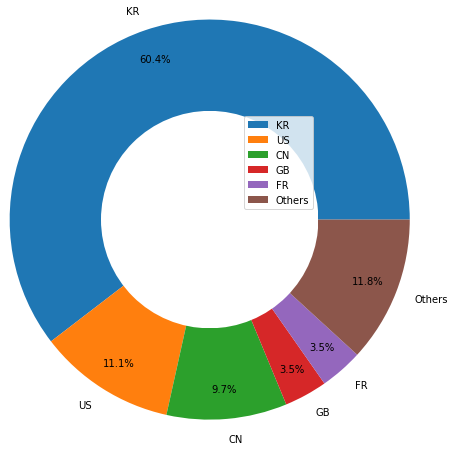

In [39]:
#Create pie chart of Player Nationality
labels = nationality_count.index.tolist()
sizes = nationality_count['nationality']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85, radius=2.3)

#draw circle
centre_circle = plt.Circle((0,0),1.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#plt.tight_layout()
plt.legend()

plt.show()

In [40]:
#Create bar graph of best players vs average players 

In [41]:
support_df = hero_pickrate.loc[(hero_pickrate["role"] == "Support")]
support_df

,hero,role,Games Used,Pick Rate
8,Lúcio,Support,319,100.000000
11,Ana,Support,307,96.238245
0,Zenyatta,Support,302,94.670846
18,Mercy,Support,282,88.401254
9,Brigitte,Support,268,84.012539
21,Moira,Support,258,80.877743
29,Baptiste,Support,209,65.517241


In [42]:
offense_df = hero_pickrate.loc[(hero_pickrate["role"] == "Damage")]
offense_df 

,hero,role,Games Used,Pick Rate
14,Tracer,Damage,304,95.297806
16,Sombra,Damage,297,93.103448
12,Widowmaker,Damage,295,92.476489
10,Hanzo,Damage,268,84.012539
20,Pharah,Damage,264,82.758621
13,Doomfist,Damage,244,76.489028
24,Mei,Damage,208,65.203762
1,McCree,Damage,168,52.664577
19,Genji,Damage,164,51.410658
25,Bastion,Damage,152,47.648903


In [43]:
tank_df = hero_pickrate.loc[(hero_pickrate["role"] == "Tank")]
tank_df 

,hero,role,Games Used,Pick Rate
4,Wrecking Ball,Tank,319,100.000000
3,D.Va,Tank,312,97.805643
7,Winston,Tank,289,90.595611
6,Reinhardt,Tank,288,90.282132
5,Orisa,Tank,257,80.564263
2,Zarya,Tank,252,78.996865
27,Roadhog,Tank,227,71.159875
30,Sigma,Tank,18,5.642633


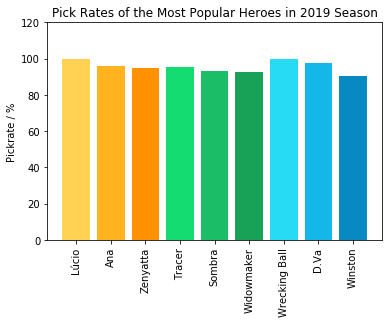

In [44]:
labelss = [
    (support_df.iloc[0,0]),
    (support_df.iloc[1,0]),
    (support_df.iloc[2,0]),
    (offense_df.iloc[0,0]),
    (offense_df.iloc[1,0]),
    (offense_df.iloc[2,0]),
    (tank_df.iloc[0,0]),
    (tank_df.iloc[1,0]),
    (tank_df.iloc[2,0]),   
]

pickrates = [
    (support_df.iloc[0,3]),
    (support_df.iloc[1,3]),
    (support_df.iloc[2,3]),
    (offense_df.iloc[0,3]),
    (offense_df.iloc[1,3]),
    (offense_df.iloc[2,3]),
    (tank_df.iloc[0,3]),
    (tank_df.iloc[1,3]),
    (tank_df.iloc[2,3]),   
]

colors_pickrates = ['#ffd254','#ffb31f','#ff9102',
                    '#14dc71','#1bbd66','#17a258',
                   '#27dbf5','#13b8e8','#0989c2']
N=9
theta = 2 * np.pi * np.random.rand(N)

x_axis = np.arange(len(labelss))
plt.xticks(x_axis, labelss, rotation=90)

plt.bar(x_axis, pickrates, align='center', color=colors_pickrates)
plt.title('Pick Rates of the Most Popular Heroes in 2019 Season')
plt.ylabel('Pickrate / %')
plt.ylim(0,(max(pickrates))+(max(pickrates)*0.2))

plt.show()


In [45]:
theta

array([3.02275172, 0.1375095 , 2.84113093, 5.10748178, 1.55319633,
       2.16443481, 1.32603123, 0.62395671, 5.38544024])

In [46]:
# this was the attempt at making a custom legend 

'''
red_patch = mpatches.Patch(color='green', label='Tank')
blue_patch = mpatches.Patch(color='blue', label='Offense')
yellow_patch = mpatches.Patch(color='yellow', label='Support')
plt.legend(handles=([red_patch],[blue_patch],[yellow_patch]))
plt.show()
'''

"\nred_patch = mpatches.Patch(color='green', label='Tank')\nblue_patch = mpatches.Patch(color='blue', label='Offense')\nyellow_patch = mpatches.Patch(color='yellow', label='Support')\nplt.legend(handles=([red_patch],[blue_patch],[yellow_patch]))\nplt.show()\n"

In [47]:
# Uses locator function to locates the stat_name column, specifically "All Damage Done"
all_damage_df = hero_class_df.loc[(hero_class_df["stat_name"] == "All Damage Done")]
all_damage_df.sort_values(by="stat_amount", ascending =False)

,match_id,stage,player,team,stat_name,hero,stat_amount,role
506348,30162,Overwatch League 2019 Post-Season,GodsB,Hangzhou Spark,All Damage Done,Bastion,73083.0295,Damage
512011,30160,Overwatch League 2019 Post-Season,Architect,San Francisco Shock,All Damage Done,Bastion,60109.0920,Damage
502902,30155,Overwatch League 2019 Post-Season,SeoMinSoo,Vancouver Titans,All Damage Done,Bastion,55457.1900,Damage
49973,21244,Overwatch League Stage 1,sinatraa,San Francisco Shock,All Damage Done,Zarya,55003.5091,Tank
505043,30163,Overwatch League 2019 Post-Season,SAEBYEOLBE,New York Excelsior,All Damage Done,Bastion,54579.8568,Damage
...,...,...,...,...,...,...,...,...
42761,21291,Overwatch League Stage 1,BUMPER,Vancouver Titans,All Damage Done,Winston,1.0000,Tank
388103,21433,Overwatch League Stage 4,CoMa,Shanghai Dragons,All Damage Done,Mercy,1.0000,Support
418353,21408,Overwatch League Stage 4,Stratus,Washington Justice,All Damage Done,Tracer,0.9000,Damage
432596,21511,Overwatch League Stage 4,Nenne,New York Excelsior,All Damage Done,Tracer,0.9000,Damage


In [48]:
# groups the above stats into an average and groups the average by team name
all_damage_df2 = all_damage_df.groupby(["team"]).mean()["stat_amount"]
all_damage_df2

team
Atlanta Reign             8844.224549
Boston Uprising           7378.813843
Chengdu Hunters           5817.772315
Dallas Fuel               7904.626737
Florida Mayhem            6842.984182
Guangzhou Charge          7285.341954
Hangzhou Spark            9477.816830
Houston Outlaws           6395.184262
London Spitfire           8087.514092
Los Angeles Gladiators    8842.679875
Los Angeles Valiant       8424.741475
New York Excelsior        8257.979682
Paris Eternal             7320.960517
Philadelphia Fusion       8240.809411
San Francisco Shock       9878.222191
Seoul Dynasty             9278.166425
Shanghai Dragons          7542.143569
Toronto Defiant           7127.093354
Vancouver Titans          9566.297400
Washington Justice        7762.859584
Name: stat_amount, dtype: float64

In [49]:
# Uses locator function to locates the stat_name column, specifically "Healing Done"
all_healing_df = hero_class_df.loc[(hero_class_df["stat_name"] == "Healing Done")]
all_healing_df.sort_values(by="stat_amount", ascending =False)

,match_id,stage,player,team,stat_name,hero,stat_amount,role
440016,21492,Overwatch League Stage 4,Boombox,Philadelphia Fusion,Healing Done,Moira,36850.4080,Support
504093,30163,Overwatch League 2019 Post-Season,JJonak,New York Excelsior,Healing Done,Moira,36240.4254,Support
498376,30154,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,Healing Done,Moira,35991.1798,Support
511489,30160,Overwatch League 2019 Post-Season,BEBE,Hangzhou Spark,Healing Done,Moira,33386.5980,Support
513081,30158,Overwatch League 2019 Post-Season,Viol2t,San Francisco Shock,Healing Done,Moira,32433.7318,Support
...,...,...,...,...,...,...,...,...
192089,21351,Overwatch League Stage 2,moth,San Francisco Shock,Healing Done,Mercy,1.2600,Support
115051,21313,Overwatch League Stage 2,JJonak,New York Excelsior,Healing Done,Ana,1.2370,Support
47128,21235,Overwatch League Stage 1,Boink,Houston Outlaws,Healing Done,Mercy,1.2000,Support
260548,21367,Overwatch League Stage 3,Greyy,Paris Eternal,Healing Done,Ana,0.7929,Support


In [50]:
# groups the above stats into an average and groups the average by team name
all_healing_df2 = all_healing_df.groupby(["team"]).mean()["stat_amount"]
all_healing_df2

team
Atlanta Reign             7441.703646
Boston Uprising           6556.930012
Chengdu Hunters           5162.377784
Dallas Fuel               6880.367184
Florida Mayhem            6003.472752
Guangzhou Charge          5846.317261
Hangzhou Spark            7549.955739
Houston Outlaws           5491.716997
London Spitfire           6755.177212
Los Angeles Gladiators    7825.342616
Los Angeles Valiant       7276.205055
New York Excelsior        7225.396520
Paris Eternal             6453.831449
Philadelphia Fusion       7315.038541
San Francisco Shock       8108.924769
Seoul Dynasty             7838.824716
Shanghai Dragons          6230.866473
Toronto Defiant           6606.959693
Vancouver Titans          7865.873309
Washington Justice        6767.672919
Name: stat_amount, dtype: float64

In [51]:
# USes locator function to locates the stat_name column, specifically "Ultimates Earned - Fractional""
all_ult_df = hero_class_df.loc[(hero_class_df["stat_name"] == "Ultimates Earned - Fractional")].reset_index(drop=True)
all_ult_df.sort_values(by="stat_amount", ascending =False)

,match_id,stage,player,team,stat_name,hero,stat_amount,role
2128,21178,Overwatch League Stage 1,Envy,Toronto Defiant,Ultimates Earned - Fractional,D.Va,21.1107,Tank
17490,21307,Overwatch League Stage 3,xepheR,Florida Mayhem,Ultimates Earned - Fractional,D.Va,18.5649,Tank
6170,20301,Overwatch League Stage 1 Title Matches,MekO,New York Excelsior,Ultimates Earned - Fractional,D.Va,18.5239,Tank
14222,21364,Overwatch League Stage 2,rCk,Boston Uprising,Ultimates Earned - Fractional,D.Va,18.2504,Tank
2470,21243,Overwatch League Stage 1,Finnsi,Paris Eternal,Ultimates Earned - Fractional,D.Va,18.2277,Tank
...,...,...,...,...,...,...,...,...
31080,30173,Overwatch League 2019 Post-Season,neptuNo,Philadelphia Fusion,Ultimates Earned - Fractional,Brigitte,0.0018,Support
32198,30164,Overwatch League 2019 Post-Season,NUS,London Spitfire,Ultimates Earned - Fractional,Brigitte,0.0018,Support
31068,30173,Overwatch League 2019 Post-Season,Boombox,Philadelphia Fusion,Ultimates Earned - Fractional,Lúcio,0.0017,Support
31053,30173,Overwatch League 2019 Post-Season,CoMa,Shanghai Dragons,Ultimates Earned - Fractional,Lúcio,0.0017,Support


In [52]:
# groups the above stats into an average and groups the average by team name
all_ult_df2 = all_ult_df.groupby(["team"]).mean()["stat_amount"]
all_ult_df2

team
Atlanta Reign             3.476801
Boston Uprising           3.205015
Chengdu Hunters           2.943363
Dallas Fuel               3.430046
Florida Mayhem            2.988001
Guangzhou Charge          2.857798
Hangzhou Spark            3.677009
Houston Outlaws           2.981220
London Spitfire           3.168636
Los Angeles Gladiators    3.518754
Los Angeles Valiant       3.673656
New York Excelsior        3.330880
Paris Eternal             3.273948
Philadelphia Fusion       3.360197
San Francisco Shock       4.016565
Seoul Dynasty             3.430053
Shanghai Dragons          3.176375
Toronto Defiant           3.096348
Vancouver Titans          3.703520
Washington Justice        3.451257
Name: stat_amount, dtype: float64

In [53]:
# Creates a dataframe to showcase the above averages
stat_average_df = pd.DataFrame({"Ult Charge" : all_ult_df2,
                                "Average Healing" : all_healing_df2,
                                "Average Damage" : all_damage_df2
                               })
# Displays the dataframe and sorts the values based on the highest stats 
stat_average_df.sort_values(by=["Ult Charge", "Average Healing", "Average Damage"], ascending=False)
stat_average_df

,Ult Charge,Average Healing,Average Damage
team,,,
Atlanta Reign,3.476801,7441.703646,8844.224549
Boston Uprising,3.205015,6556.930012,7378.813843
Chengdu Hunters,2.943363,5162.377784,5817.772315
Dallas Fuel,3.430046,6880.367184,7904.626737
Florida Mayhem,2.988001,6003.472752,6842.984182
Guangzhou Charge,2.857798,5846.317261,7285.341954
Hangzhou Spark,3.677009,7549.955739,9477.816830
Houston Outlaws,2.981220,5491.716997,6395.184262
London Spitfire,3.168636,6755.177212,8087.514092


In [54]:
# Sorting all the supports in every game by the amount of healing done
hero_class_df2 = hero_class_df[['player','team','stat_name','hero','stat_amount','role']]
hero_class_dfs = hero_class_df2.loc[hero_class_df2['role']=='Support']
hero_class_dfs = hero_class_dfs.loc[hero_class_dfs['stat_name']=='Healing Done']

In [55]:
# calculate the average healing done by each support player per hero
hero_class_dfh = hero_class_dfs.sort_values(['hero', 'stat_amount'])
hero_class_mean = hero_class_dfh.groupby(by=['team','player', 'hero'])
hero_class_mean = pd.DataFrame(hero_class_mean['stat_amount'].mean())
hero_class_mean = hero_class_mean.reset_index()
hero_class_mean.sort_values(by="stat_amount", ascending =False)

,team,player,hero,stat_amount
186,London Spitfire,Krillin,Moira,21389.108200
372,Vancouver Titans,Rapel,Baptiste,14268.141840
14,Atlanta Reign,Kodak,Zenyatta,14223.201207
207,Los Angeles Gladiators,Ripa,Zenyatta,13877.765900
258,Paris Eternal,HyP,Zenyatta,12887.084736
...,...,...,...,...
35,Boston Uprising,Persia,Baptiste,5.000000
3,Atlanta Reign,Dogman,Lúcio,4.393800
178,London Spitfire,Bdosin,Mercy,3.500000
399,Washington Justice,Gido,Lúcio,3.136000


In [56]:
#identify the players with the highest average healing for each hero 
hahdf = hero_class_mean.sort_values(['hero','stat_amount'])
best_supports_df = hahdf.drop_duplicates(subset='hero', keep='last')
best_supports_df.sort_values(by="stat_amount", ascending =False)

,team,player,hero,stat_amount
186,London Spitfire,Krillin,Moira,21389.108200
372,Vancouver Titans,Rapel,Baptiste,14268.141840
14,Atlanta Reign,Kodak,Zenyatta,14223.201207
122,Guangzhou Charge,Onlywish,Mercy,12597.818000
367,Toronto Defiant,Stellar,Brigitte,11884.013921
123,Guangzhou Charge,Rise,Ana,9862.771550
396,Washington Justice,Fahzix,Lúcio,9447.818874


In [57]:
#selecting the players who've done the most healing with each support hero
# this is a remnant of what was done before and kept in case we need this dataframe later in any analysis

highest_heal_df = hero_class_dfh.drop_duplicates(subset=['hero'], keep='last')
highest_heal_df = highest_heal_df[['player','team','hero','stat_amount']]
highest_heal_df = highest_heal_df.rename(columns={
    'stat_amount' : 'Healing by Top Player'
})


In [58]:
# create a data frame with the average healing done by each support
healing_byhero = hero_class_dfs.groupby(['hero']).mean()
healing_byhero.sort_values(by="stat_amount", ascending =False)

,stat_amount
hero,
Brigitte,8897.580251
Zenyatta,8848.593061
Moira,8338.673868
Baptiste,5938.529307
Lúcio,5912.022809
Ana,5203.385860
Mercy,4464.133900


In [59]:
#merging the two data frames
best_supports_df = best_supports_df.merge(healing_byhero, on='hero', how='outer')
best_supports_df = best_supports_df.rename(columns={
    'team' : 'Team',
    'player' : 'Player',
    'hero' : 'Hero',
    'stat_amount_x' : 'Healing by Top Player', 
    'stat_amount_y' : 'Average player Healing with Hero'
})
best_supports_df

,Team,Player,Hero,Healing by Top Player,Average player Healing with Hero
0,Guangzhou Charge,Rise,Ana,9862.771550,5203.385860
1,Vancouver Titans,Rapel,Baptiste,14268.141840,5938.529307
2,Toronto Defiant,Stellar,Brigitte,11884.013921,8897.580251
3,Washington Justice,Fahzix,Lúcio,9447.818874,5912.022809
4,Guangzhou Charge,Onlywish,Mercy,12597.818000,4464.133900
5,London Spitfire,Krillin,Moira,21389.108200,8338.673868
6,Atlanta Reign,Kodak,Zenyatta,14223.201207,8848.593061


In [60]:
#Create a list of the average healing done by each team that has player in the top supports 
team_avg_list = []

for t in range(0,len(best_supports_df)):
    team_avg = stat_average_df.loc[best_supports_df.iloc[t,0],'Average Healing']
    team_avg_list.append(team_avg)

In [61]:
#adding the list to the top support data frame
best_supports_df['Average Healing by Team'] = team_avg_list
best_supports_df = best_supports_df.sort_values(by='Healing by Top Player', ascending=False)
best_supports_df

,Team,Player,Hero,Healing by Top Player,Average player Healing with Hero,Average Healing by Team
5,London Spitfire,Krillin,Moira,21389.108200,8338.673868,6755.177212
1,Vancouver Titans,Rapel,Baptiste,14268.141840,5938.529307,7865.873309
6,Atlanta Reign,Kodak,Zenyatta,14223.201207,8848.593061,7441.703646
4,Guangzhou Charge,Onlywish,Mercy,12597.818000,4464.133900,5846.317261
2,Toronto Defiant,Stellar,Brigitte,11884.013921,8897.580251,6606.959693
0,Guangzhou Charge,Rise,Ana,9862.771550,5203.385860,5846.317261
3,Washington Justice,Fahzix,Lúcio,9447.818874,5912.022809,6767.672919


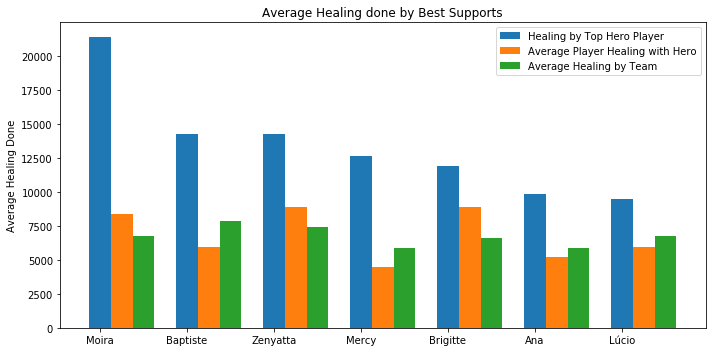

In [62]:
#plotting a grouped bar graph for the top support players 

labels = best_supports_df['Hero']

x = np.arange(len(labels))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))

x1 = np.arange(len(best_supports_df))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

rects1 = ax.bar(x1, best_supports_df['Healing by Top Player'], width, label='Healing by Top Hero Player')
rects2 = ax.bar(x2, best_supports_df['Average player Healing with Hero'], width, label='Average Player Healing with Hero')
rects3= ax.bar(x3, best_supports_df['Average Healing by Team'], width, label='Average Healing by Team')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Healing Done')
ax.set_title('Average Healing done by Best Supports')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('Average Healing done by Best Supports')
fig.tight_layout()

In [63]:
#Now we do the same for the tanks and offense 

# Sorting all the tanks in every game by ult charge 
hero_class_dft = hero_class_df2.loc[hero_class_df2['role']=='Tank']
hero_class_dft = hero_class_dft.loc[hero_class_dft['stat_name']=='Ultimates Earned - Fractional']

In [64]:
# calculate the average healing done by each support player per hero
hero_class_dft = hero_class_dft.sort_values(['hero', 'stat_amount'])
hero_class_meant = hero_class_dft.groupby(by=['team','player', 'hero'])
hero_class_meant = pd.DataFrame(hero_class_meant['stat_amount'].mean())
hero_class_meant = hero_class_meant.reset_index()

In [65]:
#identify the players with the highest average healing for each hero 
haudf = hero_class_meant.sort_values(['hero','stat_amount'])
best_tanks_df = haudf.drop_duplicates(subset='hero', keep='last')

In [66]:
# create a data frame with the average healing done by each support
ult_byhero = hero_class_dft.groupby(['hero']).mean()

In [67]:
#merging the two data frames
best_tanks_df = best_tanks_df.merge(ult_byhero, on='hero', how='outer')
best_tanks_df = best_tanks_df.rename(columns={
    'team' : 'Team',
    'player' : 'Player',
    'hero' : 'Hero',
    'stat_amount_x' : 'Ult Charge by Top Player', 
    'stat_amount_y' : 'Average player Ult Charge with Hero'
})


In [68]:
#Create a list of the average ult done by each team that has player in the top supports 
team_avg_listt = []

for t in range(0,len(best_tanks_df)):
    team_avg = stat_average_df.loc[best_tanks_df.iloc[t,0],'Ult Charge']
    team_avg_listt.append(team_avg)

#adding the list to the top tanks data frame
best_tanks_df['Average Ult Charge by Team'] = team_avg_listt
best_tanks_df = best_tanks_df.sort_values(by='Ult Charge by Top Player', ascending=False)
best_tanks_df

,Team,Player,Hero,Ult Charge by Top Player,Average player Ult Charge with Hero,Average Ult Charge by Team
0,Vancouver Titans,Haksal,D.Va,11.706700,5.973277,3.703520
1,Guangzhou Charge,fragi,Orisa,8.345500,3.415852,2.857798
7,Seoul Dynasty,Munchkin,Zarya,7.376479,5.208404,3.430053
3,Guangzhou Charge,Bischu,Roadhog,7.346100,2.049670,2.857798
4,Hangzhou Spark,Ria,Sigma,6.148780,5.339531,3.677009
2,San Francisco Shock,super,Reinhardt,5.936048,4.588273,4.016565
6,Chengdu Hunters,ameng,Wrecking Ball,4.433502,1.036557,2.943363
5,Seoul Dynasty,Marve1,Winston,3.020027,2.210945,3.430053


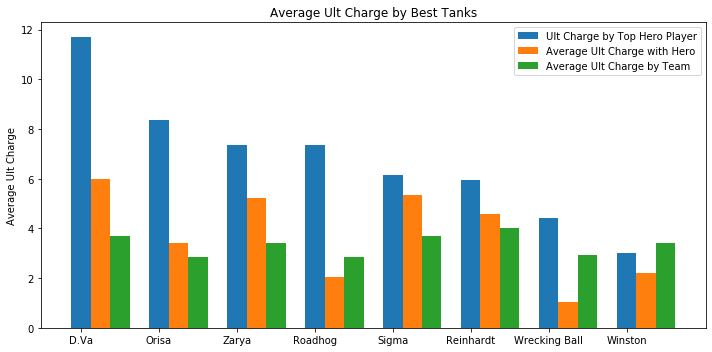

In [69]:
#plotting a grouped bar graph for the top tank players 

labelst = best_tanks_df['Hero']

x = np.arange(len(labelst))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))


x1 = np.arange(len(best_tanks_df))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

rects1 = ax.bar(x1, best_tanks_df['Ult Charge by Top Player'], width, label='Ult Charge by Top Hero Player')
rects2 = ax.bar(x2, best_tanks_df['Average player Ult Charge with Hero'], width, label='Average Ult Charge with Hero')
rects3= ax.bar(x3, best_tanks_df['Average Ult Charge by Team'], width, label='Average Ult Charge by Team')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Ult Charge')
ax.set_title('Average Ult Charge by Best Tanks')
ax.set_xticks(x)
ax.set_xticklabels(labelst)
ax.legend()
plt.savefig('Average Ult Charge done by Best Tanks')

fig.tight_layout()

In [70]:
# Sorting all the tanks in every game by ult charge 
hero_class_dfd = hero_class_df2.loc[hero_class_df2['role']=='Damage']
hero_class_dfd = hero_class_dfd.loc[hero_class_dfd['stat_name']=='All Damage Done']

In [71]:
# calculate the average healing done by each support player per hero
hero_class_dfd = hero_class_dfd.sort_values(['hero', 'stat_amount'])
hero_class_meand = hero_class_dfd.groupby(by=['team','player', 'hero'])
hero_class_meand = pd.DataFrame(hero_class_meand['stat_amount'].mean())
hero_class_meand = hero_class_meand.reset_index()

In [72]:
#identify the players with the highest average healing for each hero 
haddf = hero_class_meand.sort_values(['hero','stat_amount'])
best_damage_df = haddf.drop_duplicates(subset='hero', keep='last')

In [73]:
# create a data frame with the average healing done by each support
damage_byhero = hero_class_dfd.groupby(['hero']).mean()

In [74]:
#merging the two data frames
best_damage_df = best_damage_df.merge(damage_byhero, on='hero', how='outer')
best_damage_df = best_damage_df.rename(columns={
    'team' : 'Team',
    'player' : 'Player',
    'hero' : 'Hero',
    'stat_amount_x' : 'Damage by Top Player', 
    'stat_amount_y' : 'Average player Damage with Hero'
})

In [75]:
#Create a list of the average ult done by each team that has player in the top supports 
team_avg_listd = []

for t in range(0,len(best_damage_df)):
    team_avg = stat_average_df.loc[best_damage_df.iloc[t,0],'Average Damage']
    team_avg_listd.append(team_avg)

#adding the list to the top tanks data frame
best_damage_df['Average Damage by Team'] = team_avg_listd
best_damage_df = best_damage_df.sort_values(by='Damage by Top Player', ascending=False)
best_damage_df

,Team,Player,Hero,Damage by Top Player,Average player Damage with Hero,Average Damage by Team
1,San Francisco Shock,Architect,Bastion,43175.994114,8658.224848,9878.222191
9,Hangzhou Spark,Adora,Reaper,25420.821700,11511.831908,9477.816830
4,New York Excelsior,Fl0w3R,Hanzo,20437.511475,7833.673414,8257.979682
11,Florida Mayhem,DPI,Sombra,18158.031900,6222.565653,6842.984182
15,Guangzhou Charge,Eileen,Widowmaker,15579.412200,3536.201966,7285.341954
2,Los Angeles Gladiators,Decay,Doomfist,15150.595620,4796.296185,8842.679875
8,Shanghai Dragons,DDing,Pharah,14874.670335,8431.851841,7542.143569
7,San Francisco Shock,Rascal,Mei,13928.517210,8893.846768,9878.222191
13,Guangzhou Charge,HOTBA,Torbjörn,13058.990600,4515.786433,7285.341954
6,Shanghai Dragons,diem,McCree,12566.352136,3841.564977,7542.143569


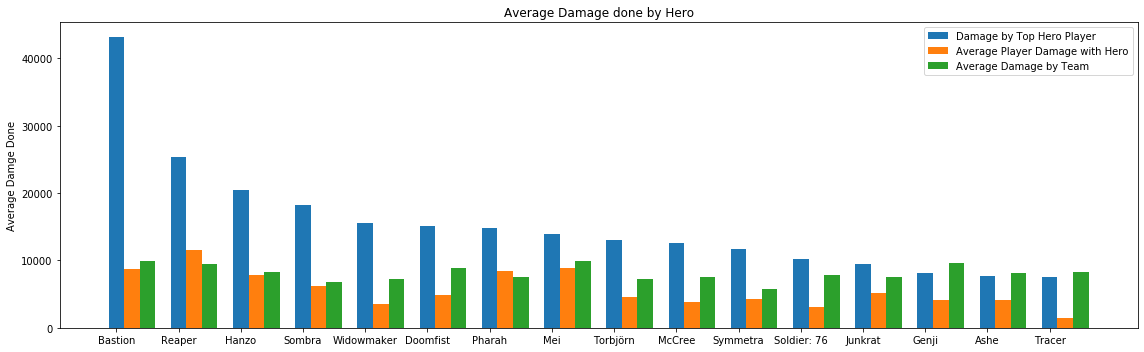

In [76]:
#plotting a grouped bar graph for the top damage players 

labelsd = best_damage_df['Hero']

x = np.arange(len(labelsd))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize=(16,5))

x1 = np.arange(len(best_damage_df))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

rects1 = ax.bar(x1, best_damage_df['Damage by Top Player'], width, label='Damage by Top Hero Player')
rects2 = ax.bar(x2, best_damage_df['Average player Damage with Hero'], width, label='Average Player Damage with Hero')
rects3= ax.bar(x3, best_damage_df['Average Damage by Team'], width, label='Average Damage by Team')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Damge Done')
ax.set_title('Average Damage done by Hero')
ax.set_xticks(x)
ax.set_xticklabels(labelsd)
ax.legend()
plt.savefig('Average Damage done by Hero')

fig.tight_layout()

In [77]:
dam5 = best_damage_df.head(5)
ult5 = best_tanks_df.head(5)
sup5 = best_supports_df.head(5)

dam5.sort_values(by="Damage by Top Player", ascending=False)

,Team,Player,Hero,Damage by Top Player,Average player Damage with Hero,Average Damage by Team
1,San Francisco Shock,Architect,Bastion,43175.994114,8658.224848,9878.222191
9,Hangzhou Spark,Adora,Reaper,25420.821700,11511.831908,9477.816830
4,New York Excelsior,Fl0w3R,Hanzo,20437.511475,7833.673414,8257.979682
11,Florida Mayhem,DPI,Sombra,18158.031900,6222.565653,6842.984182
15,Guangzhou Charge,Eileen,Widowmaker,15579.412200,3536.201966,7285.341954


In [78]:
sup5.sort_values(by="Healing by Top Player", ascending=False)

,Team,Player,Hero,Healing by Top Player,Average player Healing with Hero,Average Healing by Team
5,London Spitfire,Krillin,Moira,21389.108200,8338.673868,6755.177212
1,Vancouver Titans,Rapel,Baptiste,14268.141840,5938.529307,7865.873309
6,Atlanta Reign,Kodak,Zenyatta,14223.201207,8848.593061,7441.703646
4,Guangzhou Charge,Onlywish,Mercy,12597.818000,4464.133900,5846.317261
2,Toronto Defiant,Stellar,Brigitte,11884.013921,8897.580251,6606.959693


In [79]:
ult5.sort_values(by="Ult Charge by Top Player", ascending=False)

,Team,Player,Hero,Ult Charge by Top Player,Average player Ult Charge with Hero,Average Ult Charge by Team
0,Vancouver Titans,Haksal,D.Va,11.706700,5.973277,3.703520
1,Guangzhou Charge,fragi,Orisa,8.345500,3.415852,2.857798
7,Seoul Dynasty,Munchkin,Zarya,7.376479,5.208404,3.430053
3,Guangzhou Charge,Bischu,Roadhog,7.346100,2.049670,2.857798
4,Hangzhou Spark,Ria,Sigma,6.148780,5.339531,3.677009


In [80]:
san_fran_df = hero_picks.loc[(hero_picks["team"] == "San Francisco Shock")]
san_fran_df = san_fran_df.drop(columns=["stage","match_id","hero"])
san_fran_df

,player,team,stat_name,stat_amount,role
10161,Architect,San Francisco Shock,Average Time Alive,31.5420,Damage
10239,Rascal,San Francisco Shock,All Damage Done,4807.9735,Damage
10292,moth,San Francisco Shock,Average Time Alive,202.9570,Support
10936,Architect,San Francisco Shock,All Damage Done,2723.1201,Damage
10951,Architect,San Francisco Shock,Time Alive,4.3260,Damage
...,...,...,...,...,...
513877,Rascal,San Francisco Shock,All Damage Done,13061.8318,Damage
513890,Rascal,San Francisco Shock,All Damage Done,21447.5784,Damage
513912,Viol2t,San Francisco Shock,All Damage Done,3856.8818,Support
513923,Viol2t,San Francisco Shock,All Damage Done,4603.0941,Support


In [81]:
#san_fran_df = san_fran_df.drop_duplicates(subset='player', keep='last')
#san_fran_df.sort_values(by="role")

In [91]:
san_fran_stat = ["All Damage Done", "Healing Done", 'Ultimates Earned - Fractional']

In [94]:
san_fran_df_clean = san_fran_df[san_fran_df['stat_name'].isin(san_fran_stat)]
sorted_san_fran_damage = san_fran_df_clean.sort_values(by="stat_amount", ascending = False)

sorted_san_fran_damage.drop_duplicates(subset='player', keep='first')

,player,team,stat_name,stat_amount,role
513821,Architect,San Francisco Shock,All Damage Done,52019.3081,Damage
49998,super,San Francisco Shock,All Damage Done,31636.4111,Tank
65355,sinatraa,San Francisco Shock,All Damage Done,31533.2996,Tank
65296,Viol2t,San Francisco Shock,All Damage Done,23351.2678,Support
513890,Rascal,San Francisco Shock,All Damage Done,21447.5784,Damage
65250,Choihyobin,San Francisco Shock,All Damage Done,20084.5963,Tank
513528,STRIKER,San Francisco Shock,All Damage Done,19568.0752,Damage
513630,smurf,San Francisco Shock,All Damage Done,14501.4388,Tank
65321,moth,San Francisco Shock,All Damage Done,11919.4570,Support
50529,Nevix,San Francisco Shock,All Damage Done,382.0000,Damage
